In [1]:
import pandas as pd
import numpy as np
import src.contour_utils as cc
import matplotlib.pyplot as plt
import motif.core as core
import mir_eval
%matplotlib inline
import seaborn as sns
sns.set()
import mir_eval

In [2]:
contour_fpath = \
    "/Volumes/Dados/MedleyDB/Contours/AvaLuna_Waterduct/AvaLuna_Waterduct_MIX_RESULT.csv"
#     "test_data/LizNelson_Rainfall_MIX_vamp_melodia-contours_melodia-contours_contoursall.csv"
annotation_fpath = \
    "/Volumes/Dados/MedleyDB/Annotations/Melody_Annotations/MELODY1/AvaLuna_Waterduct_MELODY1.csv"
#     "test_data/LizNelson_Rainfall_MELODY1.csv"
contour_tfs_fpath = \
    "/Volumes/Dados/MedleyDB/Contours/AvaLuna_Waterduct/AvaLuna_Waterduct_MIX.csv"
audio_fpath = \
    "/Volumes/Dados/MedleyDB/Audio/AvaLuna_Waterduct/AvaLuna_Waterduct_MIX.wav"

In [3]:
contour_data = cc.load_contour_data(contour_fpath)
annot_data = cc.load_annotation(annotation_fpath)
conoutr_data_tfs = cc.load_primary_contour_data(contour_tfs_fpath)

#annot_data = annot_data[annot_data['f0'] != 0]

In [4]:
contour_data.iloc[0,13:]

14              148.538
15             0.075537
16             0.989751
17              145.146
18            0.0793322
19             0.992653
20              138.591
21            0.0952475
22             0.995556
23              136.999
24             0.105627
25             0.998458
26              136.999
27             0.103886
28              1.00136
29              138.591
30            0.0948093
31              1.00426
32              143.479
33            0.0821609
34              1.00717
35              145.146
36            0.0767667
37              1.01007
38              147.683
39            0.0746493
40              1.01297
41              148.538
42            0.0734242
43              1.01587
                ...    
17090               NaN
17091               NaN
17092               NaN
17093               NaN
17094               NaN
17095               NaN
17096               NaN
17097               NaN
17098               NaN
17099               NaN
17100           

In [5]:
olap_contours = contour_data.copy()

contour_times, contour_freqs, _ = cc.contours_from_contour_data(contour_data)

mel_dat = pd.DataFrame(columns=['time', 'f0', 'annot_dist'])
mel_dat['time'] = contour_times.values.ravel()
mel_dat['f0'] = contour_freqs.values.ravel()
mel_dat['annot_dist'] = -1

mel_dat.dropna(inplace=True)
mel_dat = mel_dat[mel_dat['f0'] != 0]

In [6]:
m_int = 128.0/44100.0

#doing this the slow hacky way...
annot_data['best est'] = -1
annot_data.loc[annot_data['f0'] == 0, 'best est'] = 0
niter = 0
for row in annot_data[annot_data['f0'] != 0].iterrows():
    idx = row[0]
    dat = row[1]
    t = dat['time']
    f = dat['f0']
    
    cands = mel_dat[np.abs(mel_dat['time'] - t) <= m_int]
    if len(cands) == 0:
        annot_data.loc[idx, 'best est'] = 0
    else:
        f0_cands = cands['f0'].values
        annot_data.loc[idx, 'best est'] = f0_cands[np.argmin(f0_cands - f)]
#     if niter > 10000:
#         break
#     else:
#        niter += 1

annot_data[annot_data['f0'] != 0]

,time,f0,cents,best est
8578,49.795193,217.681,2381.654359,92.4986
8579,49.800998,218.568,2388.694406,92.4986
8580,49.806803,218.467,2387.894220,88.8332
8581,49.812608,218.404,2387.394906,86.8042
8582,49.818413,218.437,2387.656469,83.8473
8583,49.824218,218.220,2385.935769,80.9912
8584,49.830023,218.524,2388.345855,0.0000
8585,49.835828,219.325,2394.680094,0.0000
8586,49.841633,220.454,2403.568956,0.0000
8587,49.847438,221.419,2411.130602,0.0000


In [7]:
mir_eval.melody.evaluate(annot_data['time'].values, annot_data['f0'].values, 
                         annot_data['time'].values, annot_data['best est'].values)

OrderedDict([('Voicing Recall', 0.93360353721444367),
             ('Voicing False Alarm', 0.0),
             ('Raw Pitch Accuracy', 0.54134119380987478),
             ('Raw Chroma Accuracy', 0.67464996315401626),
             ('Overall Accuracy', 0.86066711439444821)])

In [8]:
(np.abs(annot_data[annot_data['f0'] != 0]['f0'] - annot_data[annot_data['f0'] != 0]['best est'])).describe()

count    13570.000000
mean        93.654860
std        122.152343
min          0.000000
25%          0.910000
50%          3.930000
75%        190.082450
max       1090.637000
dtype: float64

In [9]:
# step_size = 256.0/44100.0  contour time stamp step size
# mel_time_idx = np.arange(0, np.max(mel_dat['time'].values) + 1, step_size)

# find index in evenly spaced grid of estimated time values
annot_times = annot_data['time'].values
old_times = mel_dat['time'].values
reidx = np.searchsorted(annot_times, old_times)
reidx[reidx >= len(annot_times)] = len(annot_times) - 1 

shift_idx = (np.abs(old_times - annot_times[reidx - 1]) < \
             np.abs(old_times - annot_times[reidx]))
reidx[shift_idx] = reidx[shift_idx] - 1
mel_dat.index = reidx
mel_dat['reidx'] = reidx

non_zero_annot = np.intersect1d(annot_data[annot_data['f0'] != 0].index, mel_dat.index)
mel_dat = mel_dat.loc[non_zero_annot, :]

In [10]:
mel_dat['annot_dist'] = np.abs(mel_dat['f0'] - annot_data.loc[mel_dat.index, 'f0'])

# test = annot_data.loc[mel_dat.index, :].dropna()#.drop_duplicates(subset='reidx')
# mel_dat.loc[test.index, 'annot_dist'] = mel_dat.loc[test.index, :]['annot_f0'] - test['f0']
mel_dat.sort(columns='annot_dist', inplace=True)
mel_dat.sort(columns='time', inplace=True)
mel_dat.drop_duplicates(subset='reidx', take_last=False, inplace=True)
mel_dat

/Users/itaisoares/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/itaisoares/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/itaisoares/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: the take_last=False keyword is deprecated, use keep='first' instead


,time,f0,annot_dist,reidx
8578,49.7923,92.4986,125.1824,8578
8579,49.7981,93.0344,125.5336,8579
8580,49.8068,88.8332,129.6338,8580
8581,49.8126,88.3215,130.0825,8581
8582,49.8184,84.3331,134.1039,8582
8583,49.8242,83.3644,134.8556,8583
8594,49.8881,227.7580,4.2140,8594
8595,49.8910,227.7580,4.4590,8595
8596,49.8968,225.1420,1.8820,8596
8597,49.9026,222.5560,1.5590,8597


In [11]:
step_size = 128.0/44100.0  # contour time stamp step size
mel_time_idx = np.arange(0, np.max(mel_dat['time'].values) + 1, step_size)

# find index in evenly spaced grid of estimated time values
old_times = mel_dat['time'].values
reidx = np.searchsorted(mel_time_idx, old_times)
shift_idx = (np.abs(old_times - mel_time_idx[reidx - 1]) < \
             np.abs(old_times - mel_time_idx[reidx]))
reidx[shift_idx] = reidx[shift_idx] - 1

# find duplicate time values
mel_dat['reidx2'] = reidx

mel_dat.drop_duplicates(subset='reidx', take_last=True, inplace=True)

mel_output = pd.Series(np.zeros(mel_time_idx.shape), index=mel_time_idx)
mel_output.iloc[mel_dat['reidx2']] = mel_dat['f0'].values

/Users/itaisoares/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


In [12]:
mel_output

0.000000      0
0.002902      0
0.005805      0
0.008707      0
0.011610      0
0.014512      0
0.017415      0
0.020317      0
0.023220      0
0.026122      0
0.029025      0
0.031927      0
0.034830      0
0.037732      0
0.040635      0
0.043537      0
0.046440      0
0.049342      0
0.052245      0
0.055147      0
0.058050      0
0.060952      0
0.063855      0
0.066757      0
0.069660      0
0.072562      0
0.075465      0
0.078367      0
0.081270      0
0.084172      0
             ..
242.689161    0
242.692063    0
242.694966    0
242.697868    0
242.700771    0
242.703673    0
242.706576    0
242.709478    0
242.712381    0
242.715283    0
242.718186    0
242.721088    0
242.723991    0
242.726893    0
242.729796    0
242.732698    0
242.735601    0
242.738503    0
242.741406    0
242.744308    0
242.747211    0
242.750113    0
242.753016    0
242.755918    0
242.758821    0
242.761723    0
242.764626    0
242.767528    0
242.770431    0
242.773333    0
dtype: float64

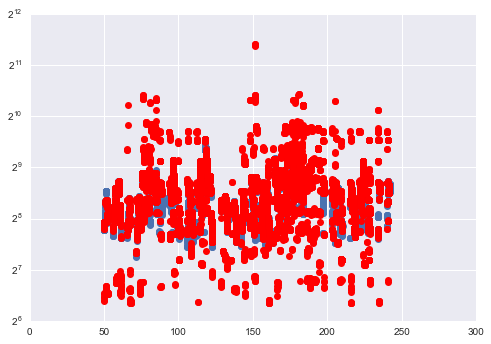

In [13]:
plt.semilogy(annot_data['time'], annot_data['f0'], 'o', basey=2)
plt.semilogy(mel_output.index, mel_output.values, 'or', basey=2)
plt.show()

In [14]:
test = annot_data.loc[mel_dat['reidx']].dropna()
test2 = test[test['f0'] != 0]#.drop_duplicates(subset='reidx')
mel_dat[mel_dat['f0'] != 0]['f0'] - test2['f0']

8578    -125.1824
8579    -125.5336
8580    -129.6338
8581    -130.0825
8582    -134.1039
8583    -134.8556
8594       4.2140
8595       4.4590
8596       1.8820
8597      -1.5590
8598      -1.6080
8599      -0.8340
8600      -0.8340
8601      -0.4750
8602       0.8440
8603       1.0360
8604       1.1070
8605       0.7490
8606      -0.2100
8607      -0.2570
8608      -1.1770
8609      -0.8770
8610      -1.3700
8611      -1.3290
8612      -1.1400
8613      -3.6970
8614      -4.3300
8615      -3.0950
8616      -2.9080
8617      -1.9350
           ...   
41621      0.9330
41622      0.3470
41623      1.5810
41624      2.6620
41625      1.4140
41626      2.3980
41627      0.6880
41628      1.1370
41629      0.9640
41630      0.5560
41631      0.4410
41632      1.3010
41633      2.7360
41634      1.8570
41635     -0.5120
41636     -1.6800
41637     -0.7940
41638     -1.7770
41639     -1.0890
41640     -3.5980
41641     -3.2810
41642     -2.6260
41643     -1.4600
41644     -2.4410
41645     

In [15]:
contours_s.iloc[1:10]

NameError: name 'contours_s' is not defined

### Ground Truth Annotation

In [ ]:
annot_data = cc.load_annotation(annotation_fpath)
annot_data.iloc[1:10]

### Plot contours with Annotation

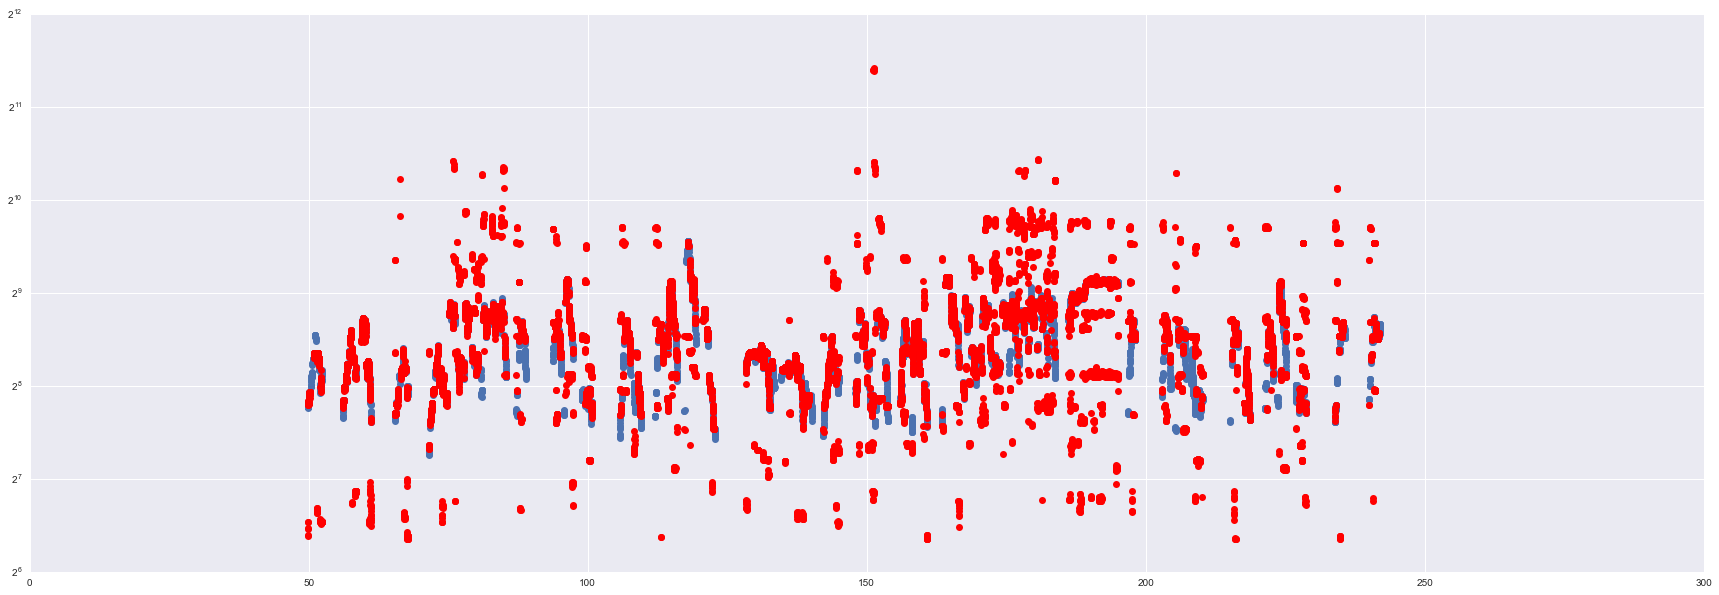

In [16]:
# cc.make_coverage_plot(contour_data, annot_data)
mel_output.keys()
plt.figure(figsize=(30,10))
plt.semilogy(annot_data['time'], annot_data['f0'], 'o', basey=2)
plt.semilogy(mel_output.keys(), mel_output, 'or', basey=2)

plt.show()

### Select annotation within time range of each contour

### Compute percentage overlap

In [41]:
# feature_data = cc.contour_overlap(contour_data, annot_data)
# contour_data
# core.Contour()
index = np.arange(conoutr_data_tfs['time'].values.size)
times = conoutr_data_tfs['time'].values
freqs = conoutr_data_tfs['freq'].values
saliences = conoutr_data_tfs['salience'].values
contorno = core.Contours(index, times, freqs, saliences, 44100, audio_fpath)
# labels, overlaps = contornos.compute_labels(annotation_fpath, overlap_threshold=0.5)
# conoutr_data_tfs


In [42]:
labels, overlaps = contornos.compute_labels(annotation_fpath, overlap_threshold=0.5)

/Users/itaisoares/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


ValueError: zero-size array to reduction operation maximum which has no identity

### Create Features + Labels

In [49]:
cc.label_contours(feature_data, 0.2)

,duration,pitch mean,pitch std,salience mean,salience std,salience tot,vibrato,vib rate,vib extent,vib coverage,labels,overlap
0,0.030395,977.538,5.55553,0.096894,0.006296,1.014678,0,0.00000,0.0000,0.000000,0,0.000000
1,0.073961,2196.570,15.28510,0.104677,0.013368,2.667378,0,0.00000,0.0000,0.000000,0,0.000000
2,0.183384,2198.560,23.15960,0.132872,0.035348,8.395048,0,0.00000,0.0000,0.000000,0,0.000000
3,0.075988,1000.090,6.10446,0.111118,0.023826,2.909074,0,0.00000,0.0000,0.000000,0,0.000000
4,0.154002,2193.050,32.33870,0.131749,0.029850,6.990401,0,0.00000,0.0000,0.000000,0,0.000000
5,0.059777,1001.060,8.18250,0.127094,0.014193,2.617514,0,0.00000,0.0000,0.000000,0,0.000000
6,0.106383,1717.360,49.50630,0.125644,0.024296,4.605135,0,0.00000,0.0000,0.000000,0,0.000000
7,0.051672,1498.600,24.35980,0.094476,0.008903,1.681911,0,0.00000,0.0000,0.000000,0,0.000000
8,0.139818,2001.680,141.79300,0.153242,0.058430,7.381905,0,0.00000,0.0000,0.000000,0,0.000000
9,0.029382,2187.810,25.15380,0.175644,0.022059,1.778055,0,0.00000,0.0000,0.000000,0,0.000000


In [12]:
print feature_data[feature_data['labels'] == 1].describe()
print feature_data[feature_data['labels'] == 0].describe()

         duration   pitch mean   pitch std  salience mean  salience std  \
count  214.000000   214.000000  214.000000     214.000000    214.000000   
mean     0.158012  2629.755327   64.239431       0.212441      0.056830   
std      0.140551   301.761543   46.030254       0.100791      0.034875   
min      0.001013  2136.960000    9.419420       0.085697      0.010842   
25%      0.050912  2401.510000   27.805475       0.148208      0.035171   
50%      0.122087  2602.080000   52.025850       0.182762      0.048336   
75%      0.211500  2829.652500   87.965325       0.243192      0.067621   
max      1.000000  3413.140000  222.988000       0.620939      0.244426   

       salience tot     vibrato    vib rate  vib extent  vib coverage  labels  \
count    214.000000  214.000000  214.000000  214.000000    214.000000     214   
mean      13.619039    0.074766    0.448275    4.499864      0.024032       1   
std       17.873876    0.263631    1.584836   16.717063      0.128346       0   


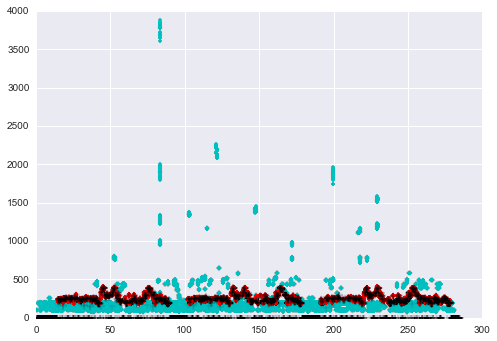

In [47]:
cc.make_coverage_plot(contour_data[feature_data['labels'] == 1], annot_data, \
                      contour_data[feature_data['labels'] == 0])